## **Fake News Detector**

 Installing Necessary Libraries

In [1]:
# Surpress warnings from using older version of sklearn:
def warn(*args, **kwargs):
    pass
import warnings


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
import re
import string

Loading the data

In [3]:
fake_news = pd.read_csv('datasets/Fake.csv')
true_news = pd.read_csv('datasets/True.csv')

View the fake news datasets

In [4]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


View the true news dataset

In [5]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Add a target column

In [6]:
fake_news['target'] = 0
true_news['target'] = 1

In [7]:
fake_news.shape, true_news.shape

((23481, 5), (21417, 5))

Combine the two dataset into one

In [8]:
data = pd.concat([fake_news, true_news], axis=0)

Reshuffling the all dataset

In [9]:
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)
data.head()

,title,text,subject,date,target
0,House committee passes sweeping tax bill,WASHINGTON (Reuters) - A Republican-led commit...,politicsNews,"November 9, 2017",1
1,COMEDY GENIUS: [Video] “Bob Ross” Paints Sick ...,Steven Crowder knocks it out of the park with ...,politics,"Sep 17, 2016",0
2,BREAKING: OFF-DUTY POLICE OFFICER Suspended Fo...,The flag ruffled an otherwise-peaceful event ...,politics,"Nov 13, 2016",0
3,NANCY PELOSI’S Face Falls After Joy Reid Quest...,"First of all, the picture of President Trump t...",politics,"Oct 22, 2017",0
4,Trump doubles down on 'law-and-order' appeal i...,PITTSBURGH (Reuters) - Donald Trump on Thursda...,politicsNews,"September 22, 2016",1


C:\Users\Joshua\AppData\Local\Temp\ipykernel_7908\1322647145.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x = 'target', palette='rocket')


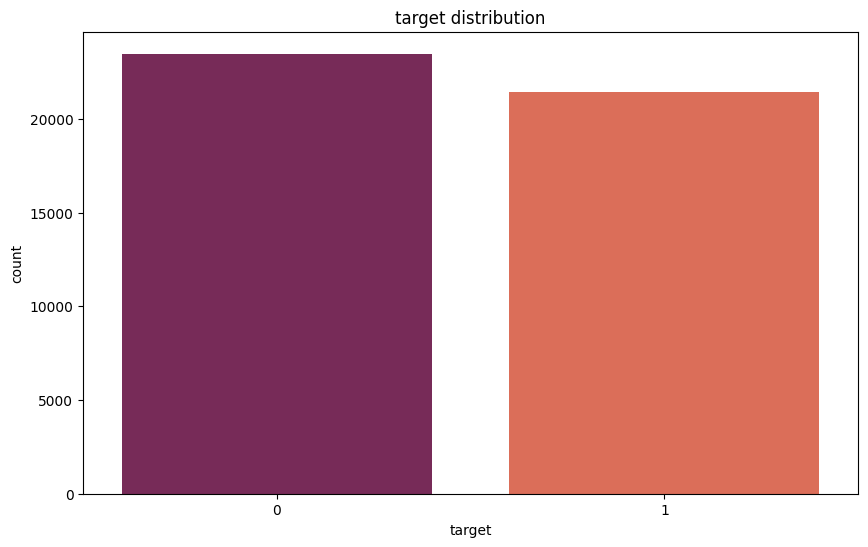

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(data = data, x = 'target', palette='rocket')
plt.title('target distribution')
plt.show()

Now let's check the distribution of the subject column

C:\Users\Joshua\AppData\Local\Temp\ipykernel_7908\3844006538.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= data, x='subject', palette='rocket')


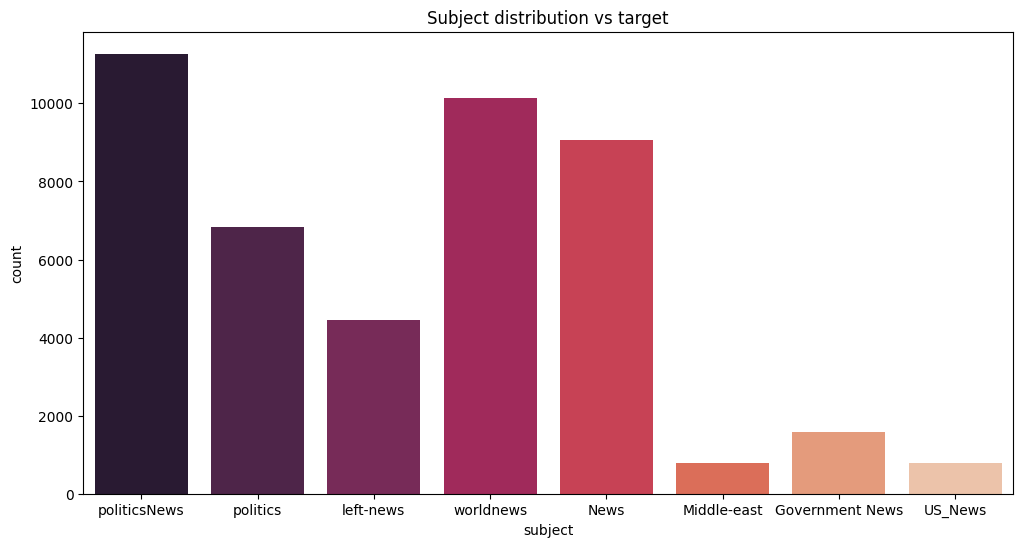

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(data= data, x='subject', palette='rocket')
plt.title('Subject distribution vs target')
plt.show()

Remove unwated columns before training the data

In [12]:
data.drop(['title', 'subject', 'date'],axis=1, inplace=True)


let's check for duplicates values

In [13]:
data.duplicated().sum()


6251

we have 6251 duplicates value, the only way to forward here is to removed

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
data.isna().sum()

text      0
target    0
dtype: int64

In [16]:
data.head(5)

,text,target
0,WASHINGTON (Reuters) - A Republican-led commit...,1
1,Steven Crowder knocks it out of the park with ...,0
2,The flag ruffled an otherwise-peaceful event ...,0
3,"First of all, the picture of President Trump t...",0
4,PITTSBURGH (Reuters) - Donald Trump on Thursda...,1


create a function to process the text column 

In [17]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

data["text"] = data["text"].apply(wordopt)

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Joshua\AppData\Local\Temp\ipykernel_7908\1850564063.py:3: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
C:\Users\Joshua\AppData\Local\Temp\ipykernel_7908\1850564063.py:5: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
C:\Users\Joshua\AppData\Local\Temp\ipykernel_7908\1850564063.py:9: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)


#### Defining dependent and independent variables

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
X= data["text"]
y = data["target"]


In [20]:
Xv_train, Xv_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
X_train = vectorization.fit_transform(Xv_train)
X_test = vectorization.transform(Xv_test)

In [22]:
print(X_train)

  (0, 22812)	0.016450874666287505
  (0, 84386)	0.13580567710438787
  (0, 40494)	0.05425706354900357
  (0, 69761)	0.044508070606010655
  (0, 38640)	0.05716659429330968
  (0, 81920)	0.2193569879926438
  (0, 63075)	0.036504210155197316
  (0, 34907)	0.06147984118797923
  (0, 51152)	0.025183705120066884
  (0, 91058)	0.05993614805103579
  (0, 4379)	0.026438216459720477
  (0, 36306)	0.09469068658910622
  (0, 47450)	0.02984779651725288
  (0, 28641)	0.05607390957528353
  (0, 3105)	0.10495762571286377
  (0, 61229)	0.06600251406036217
  (0, 4159)	0.027182083486590965
  (0, 78012)	0.08364880619602949
  (0, 82993)	0.1309603861699316
  (0, 80631)	0.11569826749219128
  (0, 36203)	0.039818082340798665
  (0, 73591)	0.03965591551823447
  (0, 90590)	0.03349908822769279
  (0, 2285)	0.03374477120806568
  (0, 82170)	0.04773105074450643
  :	:
  (28984, 72007)	0.0439561257410582
  (28984, 80417)	0.042076653559542404
  (28984, 69868)	0.042076653559542404
  (28984, 32753)	0.0439561257410582
  (28984, 18911)	0.0

## Logistic regression model
* Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
* Using cross validation to determine the hyperparameters and fit models using L1 and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.

In [23]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)

In [24]:
# Predict the class and the probability for each model
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

#Print out the predict set
y_pred.head()

,lr,l1,l2
0,0,0,0
1,1,1,1
2,1,1,1
3,1,1,1
4,0,0,0


In [25]:
y_prob.head()

,lr,l1,l2
0,0.996906,0.999980,1.000000
1,0.992799,0.999383,0.999997
2,0.941628,0.999804,0.999794
3,0.991276,0.999984,0.999975
4,0.949978,0.999426,0.999132


For each model, calculate the following error metrics:

* Accuracy
* Precision
* Recall
* F-score
* Confusion Matrix

Decide how to combine the multi-class metrics into a single value for each model.

In [26]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:
    precission, recall, fscore, _ =score(y_test,y_pred[lab], average="weighted")
    # accuracy calculation
    accurary = accuracy_score(y_test, y_pred[lab])

    # Roc -auc score can br calculate by binarizing the data

    auc = roc_auc_score(label_binarize(y_test, classes=[0,1]), label_binarize(y_pred[lab], classes=[0,1]), average="weighted")

    # confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])

    metrics.append(pd.Series({'precision': precission, 'recall' :recall,
                                 'fscore': fscore, 'accurary' : accurary, 'auc': auc},
                                   name=lab))
    
metrics = pd.concat(metrics, axis=1)


In [27]:
metrics

,lr,l1,l2
precision,0.984922,0.994210,0.992667
recall,0.984889,0.994204,0.992652
fscore,0.984881,0.994203,0.992649
accurary,0.984889,0.994204,0.992652
auc,0.984218,0.993930,0.992243


Plot the confusion matrix for each mode

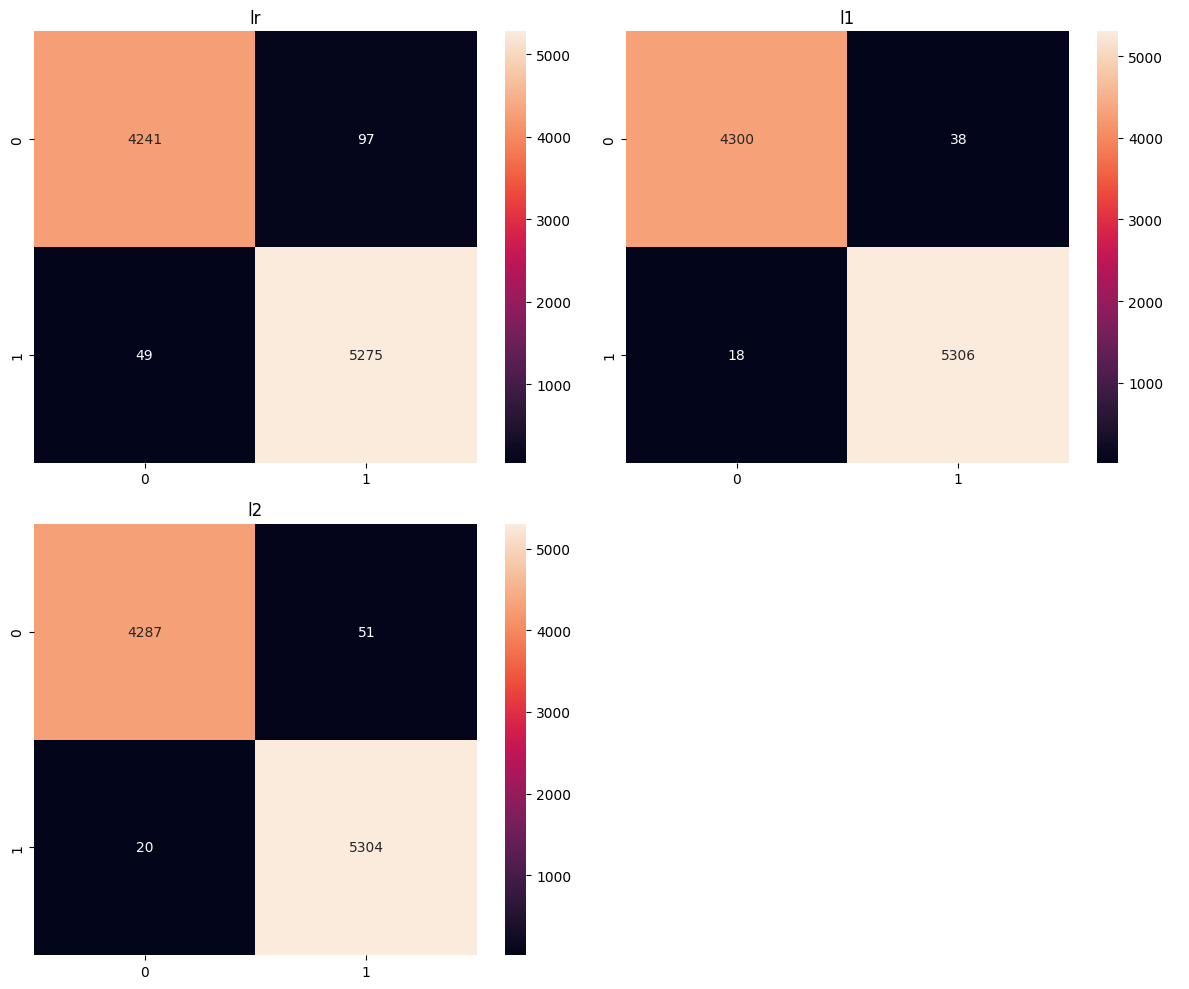

In [28]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax, lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);

plt.tight_layout()



## Build a SVM model with default parameters

The dataset has been splited the training and testing dataset.the above Training dataset will be used to train and tune models, and testing dataset will be used to evaluate the models. Note that you may also split a validation dataset from the training dataset for model tuning only.

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

fit the model

In [30]:
model = SVC(C=10, kernel='rbf')
model.fit(X_train, y_train.values.ravel())

SVC(C=10)

make predictions

In [31]:
preds = model.predict(X_test)

In [32]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [33]:
evaluate_metrics(y_test, preds)
print(classification_report(y_test,  preds))
print("Accuracy score", accuracy_score(y_test, preds))
print("f1_score", f1_score(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4338
           1       0.99      1.00      0.99      5324

    accuracy                           0.99      9662
   macro avg       0.99      0.99      0.99      9662
weighted avg       0.99      0.99      0.99      9662

Accuracy score 0.993065617884496
f1_score 0.9937236533957845


## Model Testing

In [37]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    Xv_test = {"text":[news]}
    data = pd.DataFrame(Xv_test)
    data["text"] = data["text"].apply(wordopt) 
    new_x_test = data["text"] 
    new_xv_test = vectorization.transform(new_x_test)
    pred_L = lr.predict(new_xv_test)
    pred_L1 = lr_l1.predict(new_xv_test)
    pred_L2 =lr_l2.predict(new_xv_test)
    pred_SVG = model.predict(new_xv_test)

    return print("\nlr Prediction: {} \nlr_l1 Prediction: {} \nlr_l2 Prediction: {} \nSVG Prediction: {}".format(output_lable(pred_L[0]), output_lable(pred_L1[0]), 
                                                                                                              output_lable(pred_L2[0]), 
                                                                                                              output_lable(pred_SVG[0])))


In [38]:
news = str(input())
manual_testing(news)


lr Prediction: Fake News 
lr_l1 Prediction: Fake News 
lr_l2 Prediction: Fake News 
SVG Prediction: Fake News
